In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

### Раздел 1

Загрузить таблицу Mushroom из репозитория UCI (любого источника) в объект 
DataFrame.
Вычислить распределение значений категориальных признаков по классb ).
Визуализировать распредел (sns.countplot)ения.

In [71]:
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [72]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [73]:
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
columns = X.columns.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

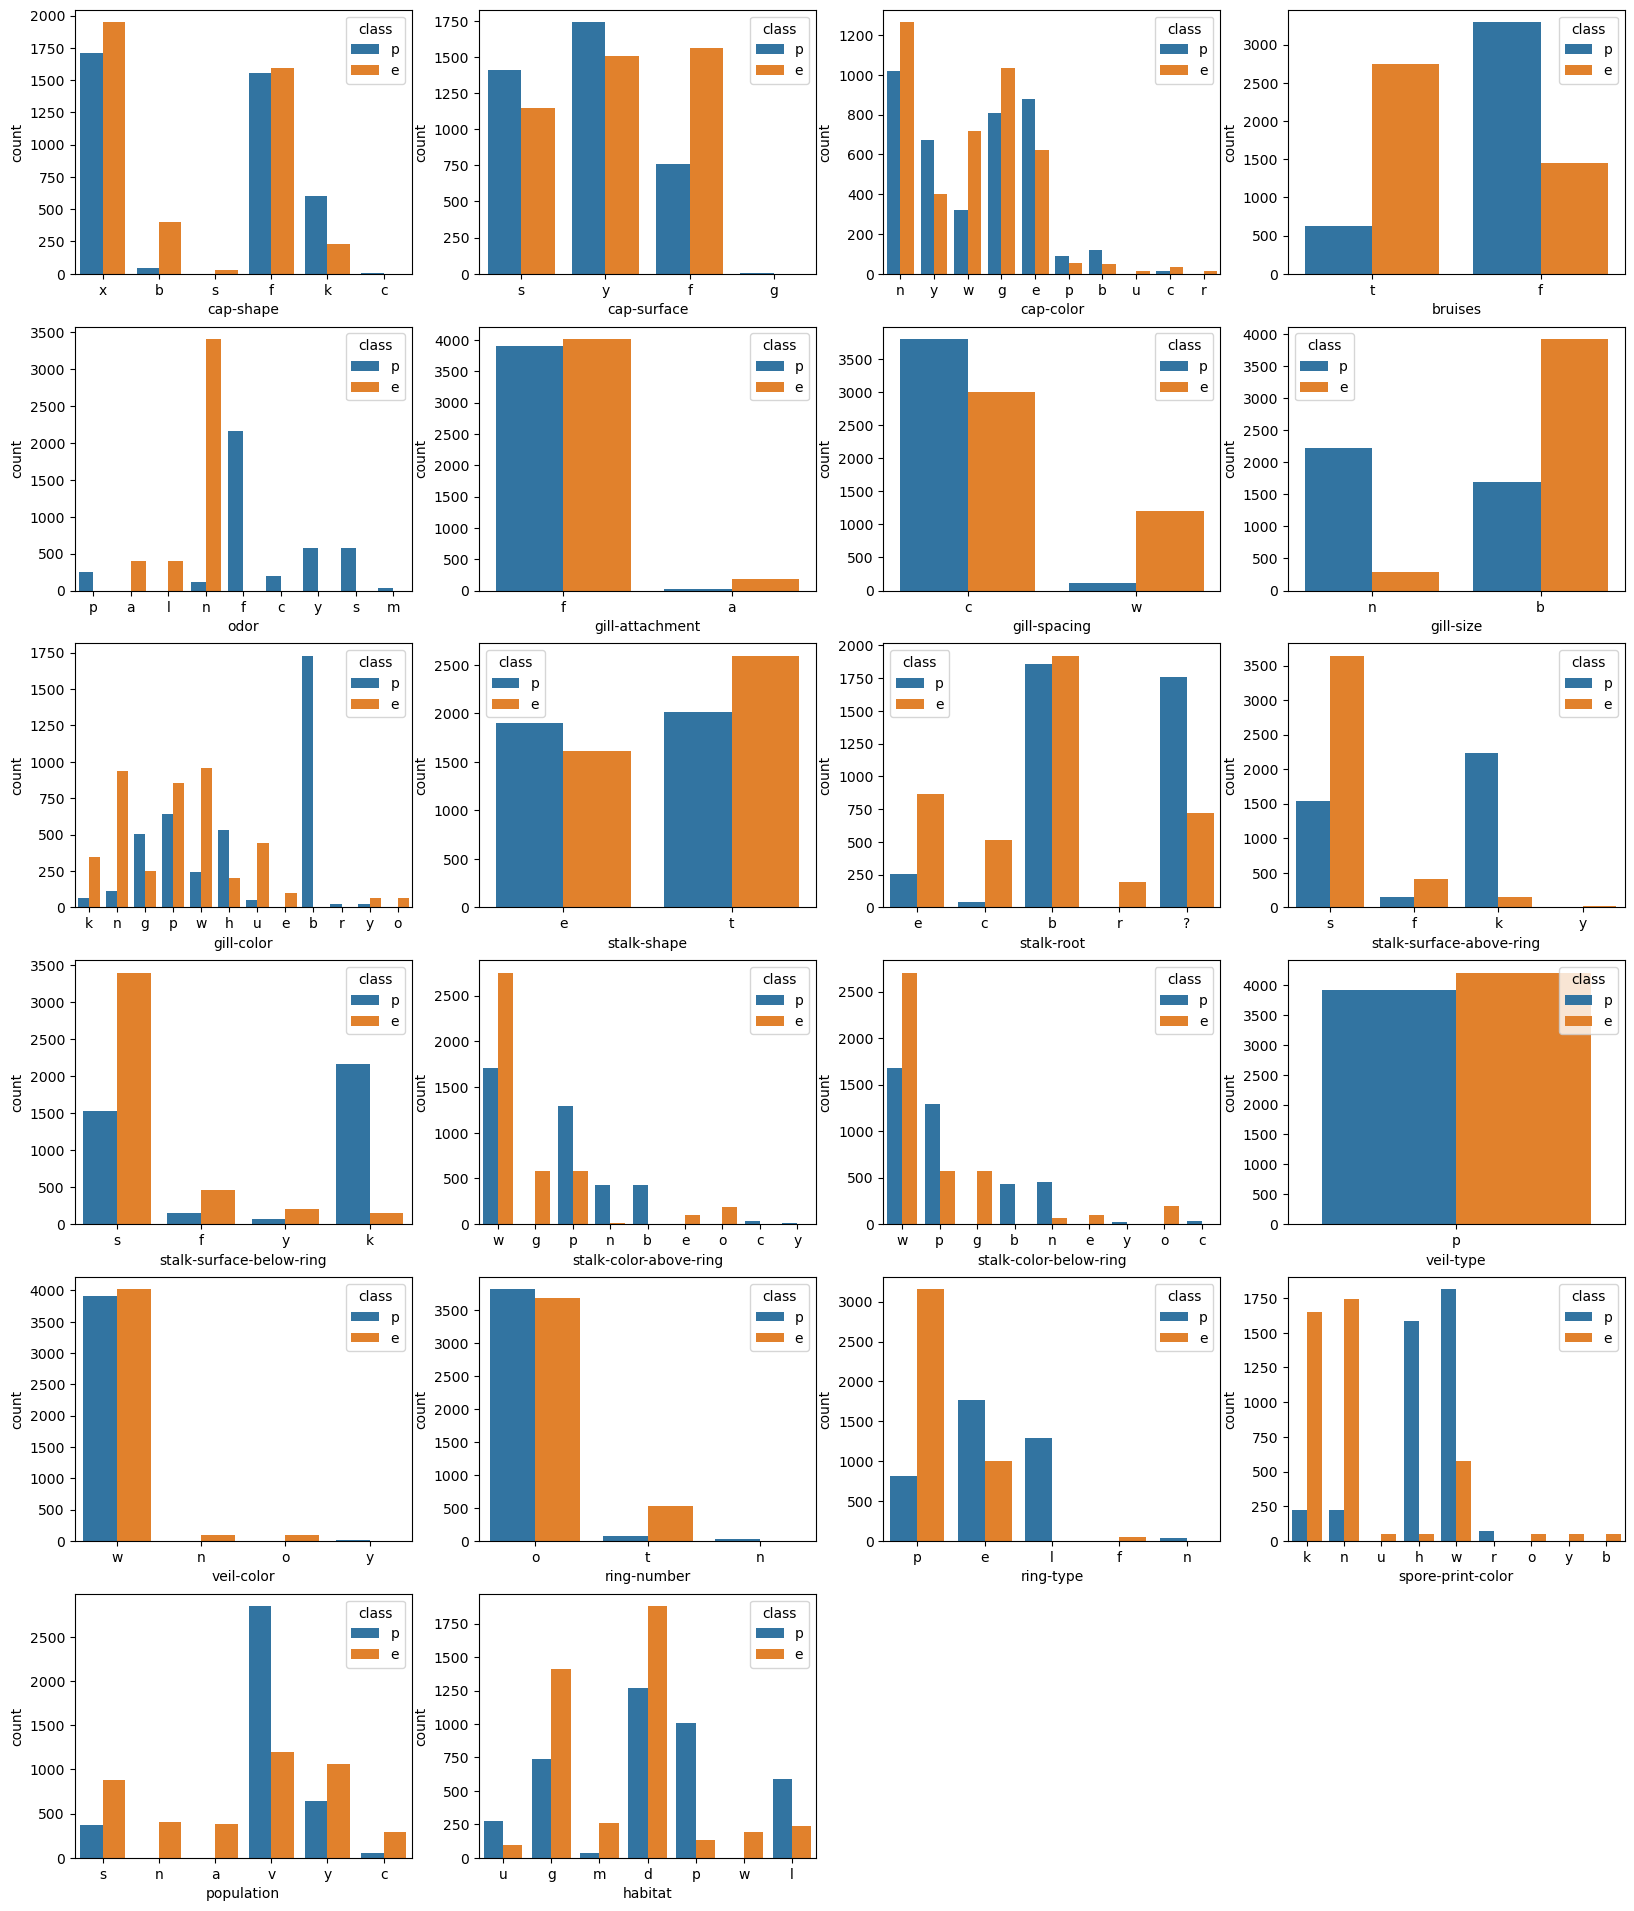

In [74]:
fig, axes = plt.subplots(6, 4, figsize=(20, 24))
axes = axes.flatten()

for i, column in enumerate(X.columns):
        sns.countplot(data=mushrooms, x=column, hue='class', ax=axes[i])

axes[22].set_visible(False)
axes[23].set_visible(False)



**Вывод:** Все переменные категориальные (это позволит нам сделать one-hot encoding). Некоторые значения в некоторых признаках встречаются весьма редко.

### Раздел 2

Построить решающую функцию по каждой переменной на основе частот.

Вычислить точность каждого решения (на той же обучающей выборке).

 Найт 
наиболее информативную переменную (с минимальным числом ошибок).

In [75]:
def create_frequency_df(X, y):
    results = []
    
    for col in X.columns:
        freq_table = pd.crosstab(X[col], y, normalize='index')
            
        for value in freq_table.index:
            e_freq = freq_table.loc[value, 'e']
            p_freq = freq_table.loc[value, 'p']
            pred = 'e' if e_freq > p_freq else 'p'      # порог бинаризации 0.5
                
            results.append([col, value, e_freq, p_freq, pred])
    
    # Создаем датафрейм с нужной структурой
    frequency_df = pd.DataFrame(
        results, 
        columns=['feature', 'val', 'e_freq', 'p_freq', 'pred']
    ).set_index(['feature', 'val'])
 
    return frequency_df

In [76]:
freq_df = create_frequency_df(X_train, y_train)

In [77]:
freq_df

e_freq    p_freq pred
feature   val                         
cap-shape b    0.891061  0.108939    e
          c    0.000000  1.000000    p
          f    0.506100  0.493900    e
          k    0.279035  0.720965    p
          s    1.000000  0.000000    e
...                 ...       ...  ...
habitat   l    0.269985  0.730015    p
          m    0.865217  0.134783    e
          p    0.122112  0.877888    p
          u    0.261745  0.738255    p
          w    1.000000  0.000000    e

[117 rows x 3 columns]

In [78]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [79]:
def get_accuracy(train, test, freq_df):

    print("============TRAIN=============")

    for col in freq_df.index.levels[0]:

        correct = 0
        total = 0

        for val in freq_df.loc[col].index:
            correct_for_val = len(train[(train[col] == val) & (train['class'] == freq_df.loc[(col, val)]['pred'])]) 
            total_with_val = len(train[train[col] == val])

            correct += correct_for_val
            total += total_with_val

        accuracy = correct / total
        print(f"Accuracy score by {col} is {accuracy:.3} on train")

    print("\n=============TEST=============")

    for col in freq_df.index.levels[0]:

        correct = 0
        total = 0

        for val in freq_df.loc[col].index:
            correct_for_val = len(test[(test[col] == val) & (test['class'] == freq_df.loc[(col, val)]['pred'])]) 
            total_with_val = len(test[test[col] == val])

            correct += correct_for_val
            total += total_with_val

        accuracy = correct / total
        print(f"Accuracy score by {col} is {accuracy:.3} on test")

In [80]:
get_accuracy(train, test, freq_df)

============TRAIN=============
Accuracy score by bruises is 0.743 on train
Accuracy score by cap-color is 0.594 on train
Accuracy score by cap-shape is 0.562 on train
Accuracy score by cap-surface is 0.584 on train
Accuracy score by gill-attachment is 0.516 on train
Accuracy score by gill-color is 0.806 on train
Accuracy score by gill-size is 0.758 on train
Accuracy score by gill-spacing is 0.619 on train
Accuracy score by habitat is 0.691 on train
Accuracy score by odor is 0.984 on train
Accuracy score by population is 0.721 on train
Accuracy score by ring-number is 0.54 on train
Accuracy score by ring-type is 0.771 on train
Accuracy score by spore-print-color is 0.866 on train
Accuracy score by stalk-color-above-ring is 0.714 on train
Accuracy score by stalk-color-below-ring is 0.714 on train
Accuracy score by stalk-root is 0.647 on train
Accuracy score by stalk-shape is 0.555 on train
Accuracy score by stalk-surface-above-ring is 0.773 on train
Accuracy score by stalk-surface-below-

**Вывод:** Самой информативной переменной оказалась *odor*, которая показала точность 0.984 на train и 0.988 на test. 

### Раздел 3

Построить «наивный» байесовский классификатор из sklearn. Оценить точность.

In [81]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [82]:
NB = BernoulliNB(alpha=1, binarize=None)
NB.fit(X_train_encoded, y_train)
y_test_pred = NB.predict(X_test_encoded)
print(f'Accuracy score on test: {accuracy_score(y_test, y_test_pred):.3f}')

Accuracy score on test: 0.950


In [83]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [84]:
NB.fit(X_train_encoded, y_train)
y_test_pred = NB.predict(X_test_encoded)
print(f'Accuracy score on test: {accuracy_score(y_test, y_test_pred):.3f}')

Accuracy score on test: 0.951


**Вывод:** Наивный байсовский классификатор из sklearn показывает точность 0.95, что сильно лучше предсказанию по одной переменной по частотам, не считая предсказания по переменной *odor*. 

Удаление одного признака для уменьшения зависимости переменных немного повысило точность.

### Раздел 4

In [85]:
def naive_bayes(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, alpha = 1) -> np.ndarray:
    """X_train, X_test already one hot encoded"""
    
    # Получаем уникальные классы
    classes = np.unique(y_train)
    n_classes = len(classes)    # в нашем случае класса 2
    n_features = X_train.shape[1]
    
    # Здесь начинается часть "обучения", то есть вычисляются все вероятности, используя только train
    # Вычисляем априорные вероятности P(y)
    class_priors = np.zeros(n_classes)
    for i, cls in enumerate(classes):
        class_priors[i] = (y_train == cls).sum() / len(y_train)
    

    # Вычисляем условные вероятности P(x_i|y)
    # Для one-hot encoded данных каждая фича - бинарная (0 или 1)
    feature_probs = np.zeros((n_classes, n_features))

    for i, cls in enumerate(classes):
        # Выбираем объекты данного класса
        X_class = X_train[y_train == cls]
        
        # Количество объектов в классе
        n_class_samples = X_class.shape[0]
        
        # Вычисляем вероятности для каждой фичи
        for feature_idx in range(n_features):
            # Количество объектов, где фича = 1 в данном классе
            count_xi_y = X_class[:, feature_idx].sum()
            
            # Применяем сглаживание Лапласа (регуляризация)
            # Для бинарных признаков n_i = 2 (0 или 1)
            feature_probs[i, feature_idx] = (count_xi_y + alpha) / (n_class_samples + alpha * 2)

    # Предсказание для тестовых данных
    y_pred = []
    
    for sample in X_test:
        class_scores = []
        for i in range(n_classes):
            score = np.log(class_priors[i])
            
            for feature_idx in range(n_features):
                if sample[feature_idx] == 1:  # Если фича присутствует
                    score += np.log(feature_probs[i, feature_idx])
                else:  # Если фича отсутствует
                    score += np.log(1 - feature_probs[i, feature_idx])
            
            class_scores.append(score)
        
        # Выбираем класс с максимальным score
        best_class_idx = np.argmax(class_scores)
        y_pred.append(classes[best_class_idx])
    
    return np.array(y_pred)


y_test_pred = naive_bayes(X_train_encoded.to_numpy(), y_train.to_numpy(), X_test_encoded.to_numpy())
print(f'Accuracy score on test: {accuracy_score(y_test, y_test_pred):.3f}')

Accuracy score on test: 0.951


**Вывод:** В самостоятельной реализации алгоритма при параметре alpha=1 точность совпадает с реализацией из sklearn.


Кстати говоря, в результате get_dummies() мы получаем явно зависимые признаки (Что противоречит предположению Наивного байесовского классификатора). Было бы лучше использовать параметр drop_first=True, но внимательно и для train, и для test, чтобы удалить один и тот же признак.